In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [4]:
datafile = 'cancer.csv'
df = pd.read_csv(datafile)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
print(df.shape)

(569, 33)


In [6]:
print(df.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#the 'Unnamed' column is all NAN, so should be droped
df=df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [8]:
df = df.sort_values(by='radius_mean', ascending=True)

numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25, numeric_only=True)
Q3 = numeric_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1 

mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df[mask]

print(f"Before removing outliers: {df.shape[0]} rows")
print(f"After removing outliers:  {df_clean.shape[0]} rows")

Before removing outliers: 569 rows
After removing outliers:  398 rows


In [9]:
Y = df_clean['diagnosis']  
X = df_clean.drop(columns=['id', 'diagnosis'], errors='ignore')  

In [10]:
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),
                              columns=X.columns,
                              index=X.index)
print(X_scaled.head())

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
101     0.000000      0.185075        0.000000   0.000000         0.862320   
46      0.089279      0.354726        0.084246   0.049639         0.371736   
525     0.116834      0.168657        0.114243   0.066128         0.650261   
61      0.118818      0.560697        0.115626   0.066553         0.977845   
59      0.120288      0.103483        0.112222   0.068848         0.554043   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
101          0.307953        0.000000             0.000000       0.590557   
46           0.219068        0.062397             0.046998       0.465944   
525          0.311454        0.100786             0.119936       0.395511   
61           0.384258        0.117878             0.073542       0.511610   
59           0.182365        0.080982             0.061946       0.399381   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
101

In [11]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

E:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [12]:
y_true = df_clean['diagnosis'].map({'B':0, 'M':1}).values

if accuracy_score(y_true, y_pred) < 0.5:
    y_pred = 1 - y_pred

accuracy = accuracy_score(y_true, y_pred)
print(f"Clustering Accuracy: {accuracy:.4f}")

Clustering Accuracy: 0.9347


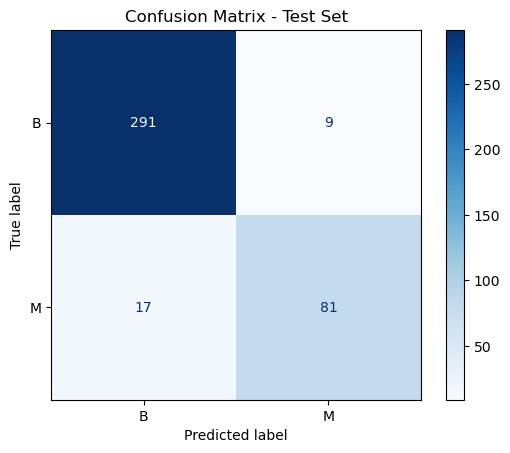

In [13]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [16]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y_pred)

selected_features = X.columns[selector.get_support()]
print("Selected features based on clustering:", list(selected_features))

Selected features based on clustering: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [17]:
kmeans_selected = KMeans(n_clusters=2, n_init=10, random_state=42)
y_pred_selected = kmeans_selected.fit_predict(X_selected)

E:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering Accuracy AFTER feature selection: 0.9271

Confusion Matrix AFTER feature selection:


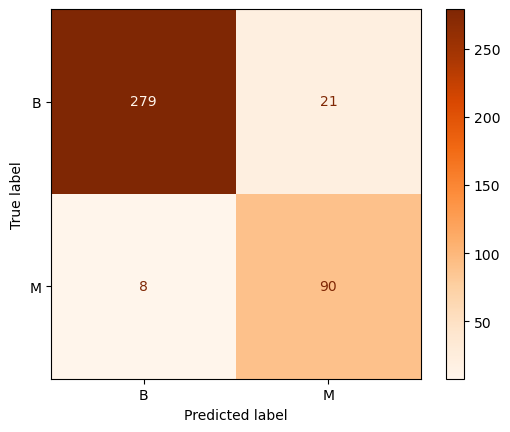

In [20]:
if accuracy_score(y_true, y_pred_selected) < 0.5:
    y_pred_selected = 1 - y_pred_selected
    
accuracy = accuracy_score(y_true, y_pred_selected)
print(f"Clustering Accuracy AFTER feature selection: {accuracy:.4f}")

print("\nConfusion Matrix AFTER feature selection:")
cm2 = confusion_matrix(y_true, y_pred_selected)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=['B','M'])
disp2.plot(cmap=plt.cm.Oranges)
plt.show()

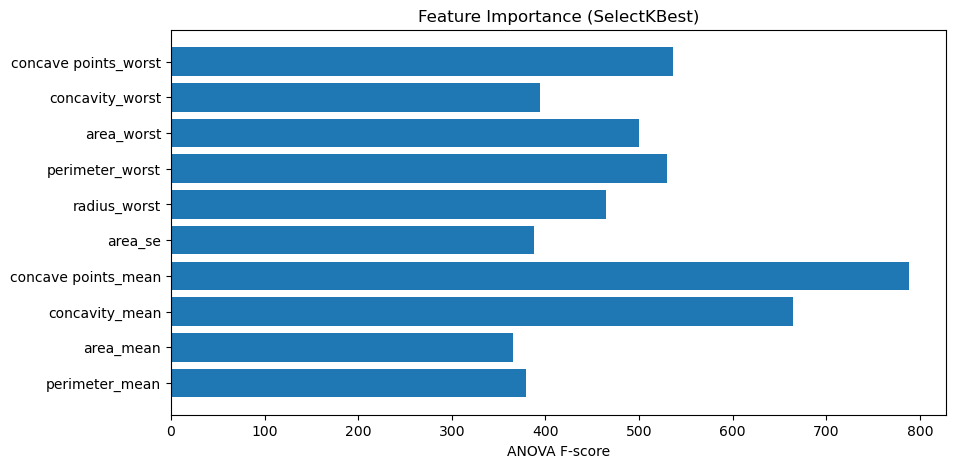

In [19]:
scores = selector.scores_[selector.get_support()]
plt.figure(figsize=(10,5))
plt.barh(selected_features, scores)
plt.xlabel("ANOVA F-score")
plt.title("Feature Importance (SelectKBest)")
plt.show()